In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Simulation

In [ ]:
coin = make_array('heads', 'tails')

In [ ]:
np.random.choice(coin)

In [ ]:
np.random.choice(coin, 10)

In [ ]:
sum(np.random.choice(coin, 10) == 'heads')

In [ ]:
# Simulate one outcome

def heads_in_100_tosses():
    return sum(np.random.choice(coin, 100) == 'heads')

In [ ]:
# Decide how many times you want to repeat the experiment

num_simulations = 10000

In [ ]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(num_simulations):
    outcomes = np.append(outcomes, heads_in_100_tosses())
    
outcomes

In [ ]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(24.5, 76.5))

# Chance #

### Probability Question

### Another Question

### Complement Rule

### The Monty Hall Problem ###

In [2]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'],
      dtype='<U11')

In [4]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [5]:
goats = [other_goat('first goat'), other_goat('second goat')]

In [6]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_choice = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_choice]

In [9]:
monty_hall()

['car', 'second goat', 'first goat']

In [10]:
results = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    results.append(monty_hall())


In [11]:
results.show(3)

Guess,Revealed,Remaining
first goat,second goat,car
car,second goat,first goat
first goat,second goat,car


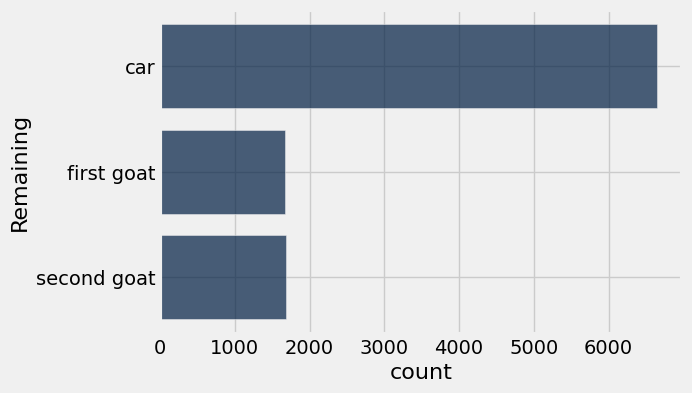

In [16]:
remaining = results.group('Remaining')
remaining.barh('Remaining')

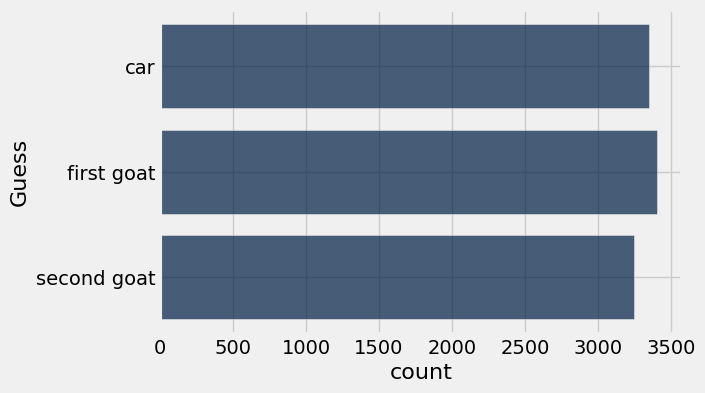

In [17]:
guess = results.group('Guess')
guess.barh('Guess')

In [22]:
joined = remaining.join('Remaining', guess, 'Guess').relabeled('count', 'Remaining cnt').relabeled('Remaining', 'Item').relabeled('count_2', 'Guess cnt')

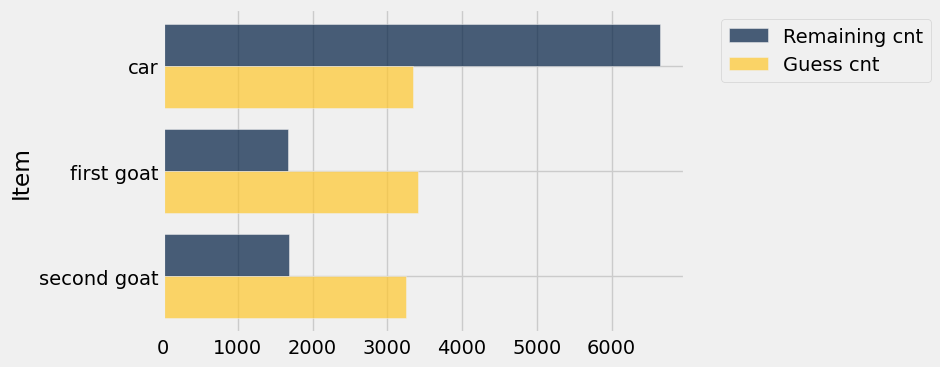

In [23]:
joined.barh('Item')